# Bitcoin dataset analysis

### Loading dataset from 2017

In [1]:
import pandas as pd
import pandas_bokeh

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

bitcoin_2017 = pd.read_csv("datasets/BTC-2017min.csv")
bitcoin_2017.head()

Loading BokehJS ...

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


#### About each Column:

- <strong>Unix Timestamp</strong> - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
- <strong>Date</strong> - This timestamp is UTC Timezone
- <strong>Symbol</strong> - The symbol for which the timeseries data refers
- <strong>Open</strong> - This is the opening price of the time period
- <strong>High</strong> - This is the highest price of the time period
- <strong>Low</strong> - This is the lowest price of the time period
- <strong>Close</strong> - This is the closing price of the time period
- <strong>Volume BTC</strong> - This is the volume that was transacted 
- <strong>Volume USD</strong> - This is the volume in the base/converted

### Modify Columns

#### Remove unecessary columns

In [2]:
bitcoin_2017 = bitcoin_2017.drop(['unix'], axis = 1)
bitcoin_2017 = bitcoin_2017.drop(['symbol'], axis = 1)

#### Index by date

In [3]:
bitcoin_2017['date'] = pd.to_datetime(bitcoin_2017['date'])
bitcoin_2017 = bitcoin_2017.set_index('date')

#### Reverse row order (From oldest to newest)

In [4]:
bitcoin_2017 = bitcoin_2017.iloc[::-1]

#### Change column names and order

In [5]:
bitcoin_2017.rename(columns = 
                    {'open':'open price', 'high':'highest price', 'low':'lowest price', 
                     'close':'close price', 'Volume BTC': 'volume bitcoin', 'Volume USD': 'volume euro'}, 
                    inplace = True)

In [6]:
bitcoin_2017 = bitcoin_2017[['open price','close price','highest price','lowest price','volume bitcoin','volume euro']]

#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [7]:
bitcoin_2017['open price'] = bitcoin_2017['open price'] * 0.924428
bitcoin_2017['close price'] = bitcoin_2017['close price'] * 0.924428
bitcoin_2017['highest price'] = bitcoin_2017['highest price'] * 0.924428
bitcoin_2017['lowest price'] = bitcoin_2017['lowest price'] * 0.924428

#### Describe dataframe

In [8]:
bitcoin_2017.describe()

,open price,close price,highest price,lowest price,volume bitcoin,volume euro
count,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,3650.019259,3649.955408,3653.531911,3645.714669,8.939796,4.143441e+04
std,3639.249293,3639.191976,3644.448907,3632.622971,20.779163,1.173633e+05
min,695.169856,695.206833,695.918643,694.559734,0.000000,0.000000e+00
25%,1106.956309,1106.965553,1107.446255,1106.577293,0.348564,7.167660e+02
50%,2373.413424,2373.163829,2375.197570,2371.481370,2.575998,7.249086e+03
75%,4192.803282,4192.280980,4196.353085,4188.611001,9.416233,3.294400e+04
max,18179.579185,18179.569941,18179.801048,18164.973223,1616.060001,5.145939e+06


### Resampling

In [62]:
# resample the data to get the highest price per day
price = [col for col in bitcoin_2017.columns if 'price' in col]

day_resample_max = bitcoin_2017[price].resample('D').max()

#### Transactions bitcoin overview

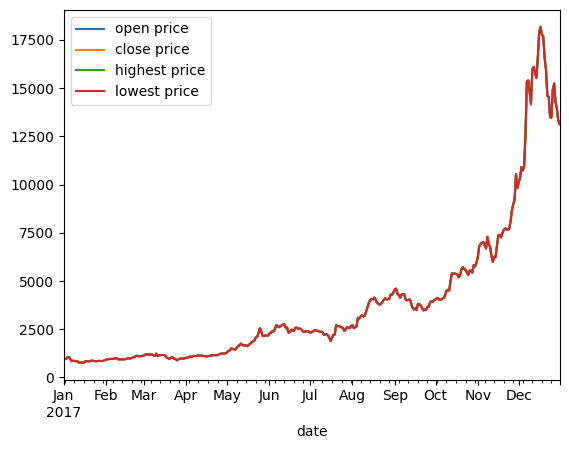

In [63]:
plot_1 = day_resample_max.plot()

In [66]:
plot_2 = day_resample_max.plot_bokeh(
    figsize=(1200,600),
    legend = "top_left",
    ylabel = "Highest Price",
    xlabel = "Date",
    title = "Bitcoin 2017"
)

In [67]:
bitcoin_2017

,open price,close price,highest price,lowest price,volume bitcoin,volume euro
date,,,,,,
2017-01-01 00:01:00,893.311754,893.311754,893.311754,893.311754,7.610000,7353.847400
2017-01-01 00:02:00,893.145356,893.339486,893.339486,893.145356,8.087376,7815.397864
2017-01-01 00:03:00,893.339486,893.339486,893.339486,893.339486,0.000000,0.000000
2017-01-01 00:04:00,893.339486,893.339486,893.339486,893.339486,0.000000,0.000000
2017-01-01 00:05:00,893.394952,893.394952,893.394952,893.394952,0.107000,103.408010
...,...,...,...,...,...,...
2017-12-31 23:55:00,12780.263321,12780.263321,12780.263321,12780.263321,0.065501,905.560130
2017-12-31 23:56:00,12782.065956,12812.183820,12857.582479,12782.065956,0.666459,9236.841134
2017-12-31 23:57:00,12857.619456,12861.807115,12861.807115,12826.429256,0.775012,10782.944294
